<a href="https://colab.research.google.com/github/Sunil-K-S/Deep_Learning_Self_Driving_Car/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline

def live_plot(x, y, figsize=(4,4), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    #plt.xlim(0, training_steps)
    #plt.ylim(0, 100)
    x= [float(i) for i in x]
    y= [float(i) for i in y]
    
    if len(x) > 1:
        plt.scatter(x,y, label='axis y', color='k') 
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, [x * m for x in x] + b)

    plt.title(title)
    plt.grid(True)
    plt.xlabel('axis x')
    plt.ylabel('axis y')
    plt.show();


In [3]:

def draw(x1, x2):
  line = plt.plot(x1, x2)

def get_sigmoid(score):
  return 1/(1+np.exp(-score))

# cross entropy loss
def calculate_error(line_params, points, y):
  m = points.shape[0]
  p = get_sigmoid(points * line_params)
  cross_entropy = -(1/m)*(np.log(p).T *y + np.log(1-p).T * (1-y))
  return cross_entropy

def gradient_descent(line_params, points, y, alpha):
  m = points.shape[0]
  for i in range(2000):
    p = get_sigmoid(points * line_params)
    gradient = (points.T * (p - y))*(alpha/m)
    line_params = line_params - gradient
    w1 = line_params.item(0)
    w2 = line_params.item(1)
    b = line_params.item(2)
    x1 = np.array([points[:, 0].min(), points[:,0].max()])
    x2 = -b/w2 +x1*(-w1/w2)
    #live_plot(x1, x2)
    #print(calculate_error(line_params, points, y))
  draw(x1, x2)



In [4]:
n_pts = 10
np.random.seed(0)
bias = np.ones(n_pts)
random_x1_values = np.random.normal(10, 2, n_pts)
random_x2_values = np.random.normal(12, 2, n_pts)
top_region = np.array([random_x1_values, random_x2_values, bias]).transpose()
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
all_points = np.vstack((top_region, bottom_region))
#print(all_points)
w1 = -0.2
w2 = -0.35
b = 3.5
line_parameters = np.matrix([w1, w2, b]).T
x1 = np.array([bottom_region[:, 0].min(), top_region[:,0].max()])
x2 = -b/w2 +x1*(-w1/w2)
#print(x1, x2)
#print(all_points.shape)
#print(line_parameters.shape)
#top_region
linear_combination = all_points * line_parameters
#print(linear_combination)
probabilities = get_sigmoid(linear_combination)
#print(probabilities)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

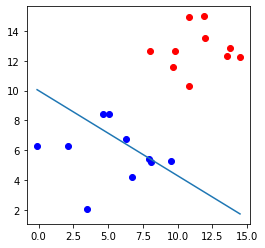

In [5]:
_, ax = plt.subplots(figsize = (4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color = 'r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color = 'b')
draw(x1,x2)
plt.show()

In [6]:
# Cross Entropy
print(calculate_error(line_parameters, all_points, y))

[[0.31787835]]


In [7]:
# Line calcuation is computer's job. Hence make it all zeros
# Revisiting the above steps

n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).transpose()
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
all_points = np.vstack((top_region, bottom_region))
line_parameters = np.matrix([np.zeros(3)]).T
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
# y

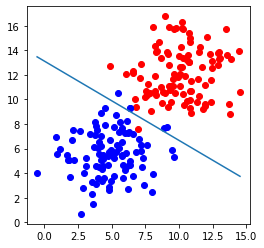

In [8]:
_, ax = plt.subplots(figsize = (4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color = 'r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color = 'b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()